# Regression - Assignment

## Question 1: What is Simple Linear Regression?
**Answer:**  
Simple Linear Regression models the relationship between one independent variable (X) and one dependent variable (Y) using a straight line:

\[ Y = \beta_0 + \beta_1 X + \epsilon \]

### Real-life example:
Predicting **monthly house rent** based on **house area**. As area increases, rent usually increases in a linear manner.


## Question 2: Key Assumptions of Simple Linear Regression
1. **Linearity** – Relationship between X and Y is linear  
   *Example:* Salary vs years of experience  
2. **Independence of errors** – Errors are not correlated  
3. **Homoscedasticity** – Constant variance of errors  
   *Example:* Prediction error does not increase for expensive houses  
4. **Normality of errors** – Residuals follow normal distribution  
5. **No extreme outliers**


## Question 3: What is heteroscedasticity?
**Answer:**  
Heteroscedasticity occurs when the variance of residuals changes with the level of the independent variable.

### Real-life example:
In income prediction, prediction errors are small for low-income groups but large for high-income groups.

### Why it matters:
- Unreliable confidence intervals  
- Incorrect hypothesis testing  
- Poor model interpretation


## Question 4: What is Multiple Linear Regression?
**Answer:**  
Multiple Linear Regression models the relationship between one dependent variable and multiple independent variables.

\[ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \epsilon \]

### Example:
Predicting house prices using **area, number of rooms, and location score**.


## Question 5: What is Polynomial Regression?
**Answer:**  
Polynomial Regression captures **non-linear relationships** by adding polynomial terms of the independent variable.

### Real-life example:
Vehicle braking distance increases non-linearly with speed.


## Question 6: Simple Linear Regression – Python Implementation

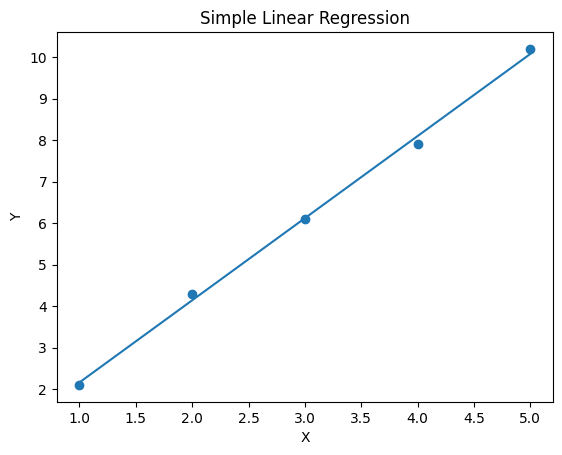

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


## Question 7: Multiple Linear Regression with VIF

In [2]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]
X_const = sm.add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

print(vif)


  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


## Question 8: Polynomial Regression (Degree 2)

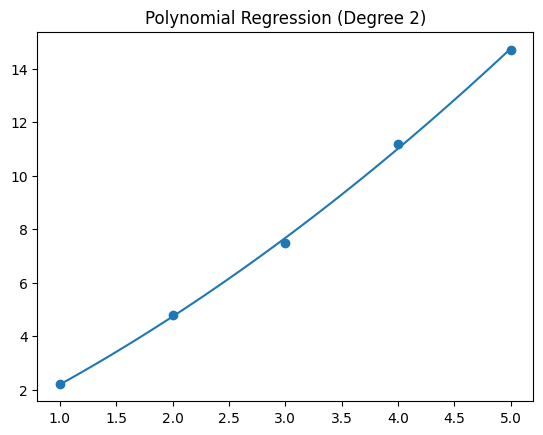

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_plot = np.linspace(1, 5, 100).reshape(-1, 1)
Y_plot = model.predict(poly.transform(X_plot))

plt.scatter(X, Y)
plt.plot(X_plot, Y_plot)
plt.title("Polynomial Regression (Degree 2)")
plt.show()


## Question 9: Residual Plot for Heteroscedasticity

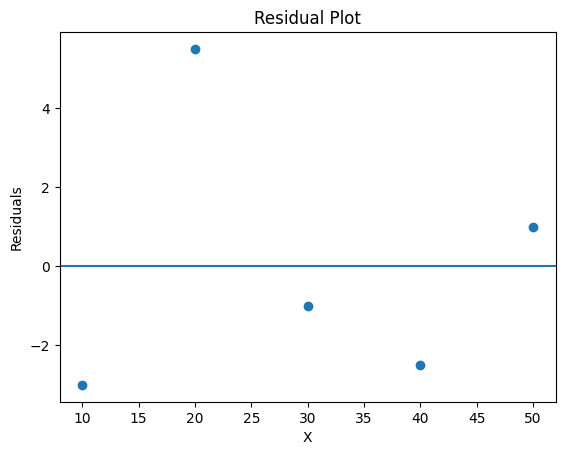

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals)
plt.axhline(0)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Question 10: Handling Heteroscedasticity & Multicollinearity
**Steps to ensure a robust model:**

### Handling Heteroscedasticity:
- Examine residual plots  
- Apply log / Box-Cox transformations  
- Use robust or weighted regression  

### Handling Multicollinearity:
- Check Variance Inflation Factor (VIF)  
- Remove or combine correlated features  
- Use Ridge or Lasso regression  

### Real-life context:
In real estate pricing, **area and number of rooms** are often highly correlated. Removing one improves model stability.
